# Analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")


In [17]:
df_one = pd.read_csv('results/latencies_one_cacheline.csv')
df_two = pd.read_csv('results/latencies_two_cacheline.csv')

print("One cacheline data:")
print(df_one.head())
print(f"\nShape: {df_one.shape}")
print(f"\nTwo cacheline data:")
print(f"\nShape: {df_two.shape}")


One cacheline data:
   core1  core2  latency_ns_med  latency_ns_p90  latency_ns_p95
0      0      1              53              62              77
1      0      2              54              55              70
2      0      3              52              53              55
3      0      4              55              59              62
4      0      5              56              64              82

Shape: (1560, 5)

Two cacheline data:

Shape: (1560, 5)


In [18]:
def print_statistics(df, name):
    print(f"\n{'='*60}")
    print(f" {name}")
    print(f"{'='*60}")
    print(f"\nMedian latency statistics:")
    print(df['latency_ns_med'].describe())
    print(f"\nMin latency: {df['latency_ns_med'].min():.1f} ns")
    print(f"Max latency: {df['latency_ns_med'].max():.1f} ns")
    print(f"Mean latency: {df['latency_ns_med'].mean():.1f} ns")
    print(f"Std latency: {df['latency_ns_med'].std():.1f} ns")

print_statistics(df_one, "ONE CACHE LINE")
print_statistics(df_two, "TWO CACHE LINES")



 ONE CACHE LINE

Median latency statistics:
count    1560.000000
mean       56.835256
std         9.043926
min        25.000000
25%        53.000000
50%        55.000000
75%        57.000000
max        93.000000
Name: latency_ns_med, dtype: float64

Min latency: 25.0 ns
Max latency: 93.0 ns
Mean latency: 56.8 ns
Std latency: 9.0 ns

 TWO CACHE LINES

Median latency statistics:
count    1560.000000
mean      111.140385
std         9.029574
min        24.000000
25%       107.000000
50%       111.000000
75%       116.000000
max       130.000000
Name: latency_ns_med, dtype: float64

Min latency: 24.0 ns
Max latency: 130.0 ns
Mean latency: 111.1 ns
Std latency: 9.0 ns


## 3. Heatmap


In [19]:
def create_heatmap(df, column, title, figsize=(14, 12), save_path=None):
    matrix = df.pivot(index='core1', columns='core2', values=column)
    matrix = matrix.sort_index(axis=0).sort_index(axis=1)

    fig, ax = plt.subplots(figsize=figsize)

    sns.heatmap(matrix, annot=True, fmt='.0f', cmap='viridis',
                square=True, linewidths=0.5, cbar_kws={'label': 'Latency (ns)'},
                ax=ax, annot_kws={'size': 9})

    ax.set_xlabel('Target Core', fontsize=14, fontweight='bold')
    ax.set_ylabel('Source Core', fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')

    return fig, matrix

## 4. One Cache Line - Median


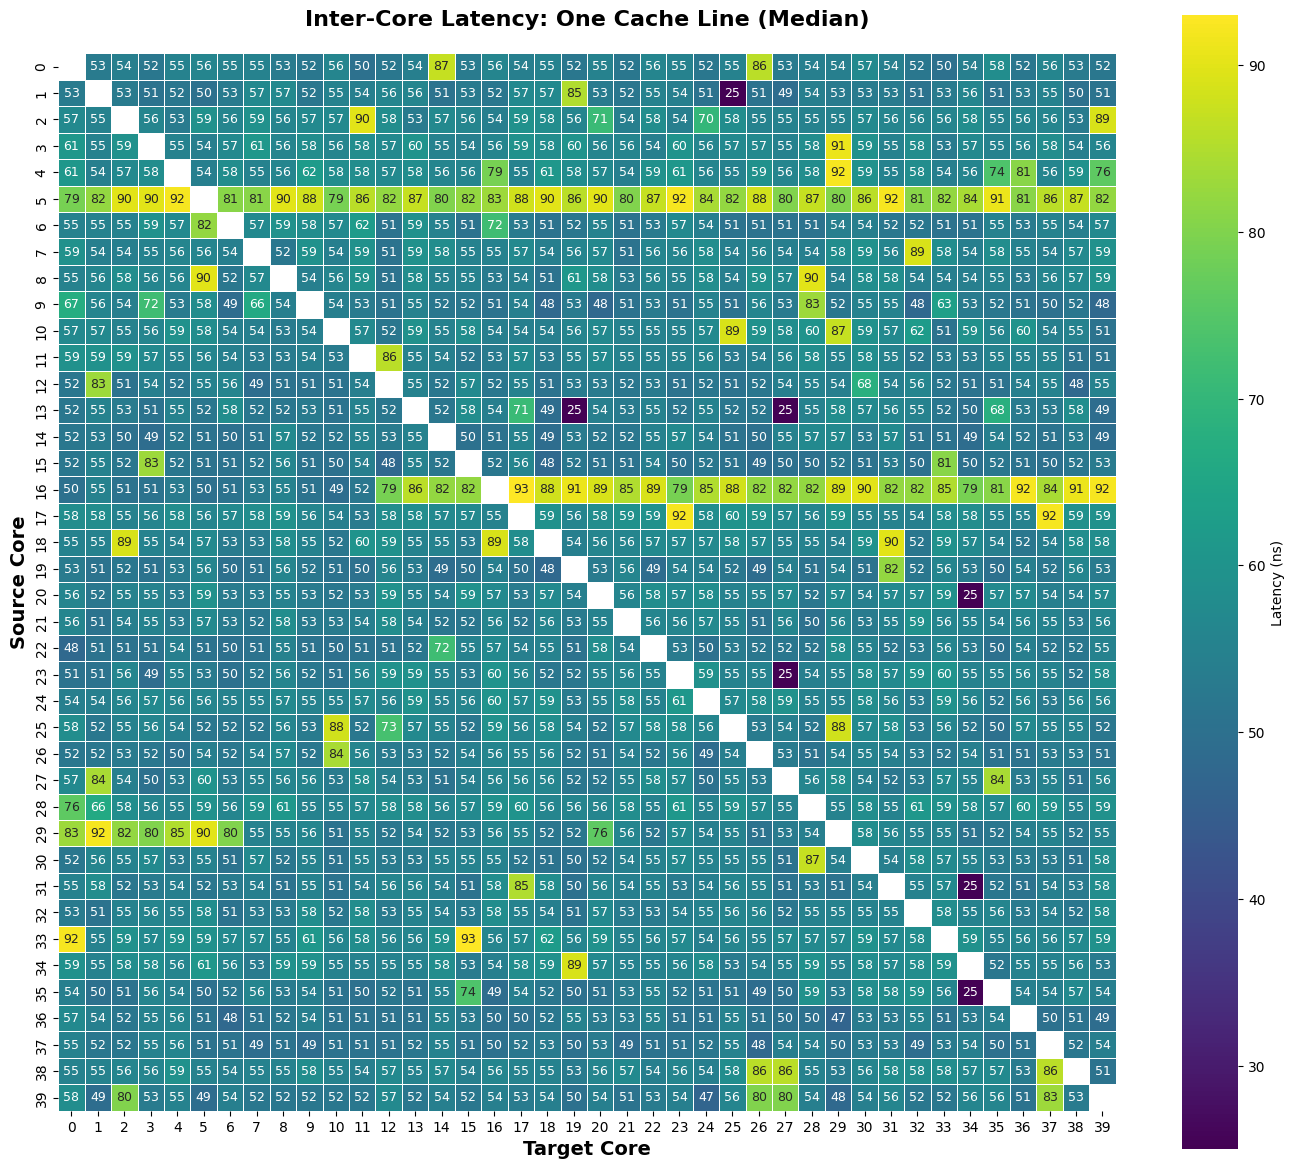

In [20]:
fig1, matrix1 = create_heatmap(
    df_one, 'latency_ns_med',
    'Inter-Core Latency: One Cache Line (Median)',
    save_path='results/heatmap_one_median.png'
)
plt.show()



## 5. Two Cache Lines - Median


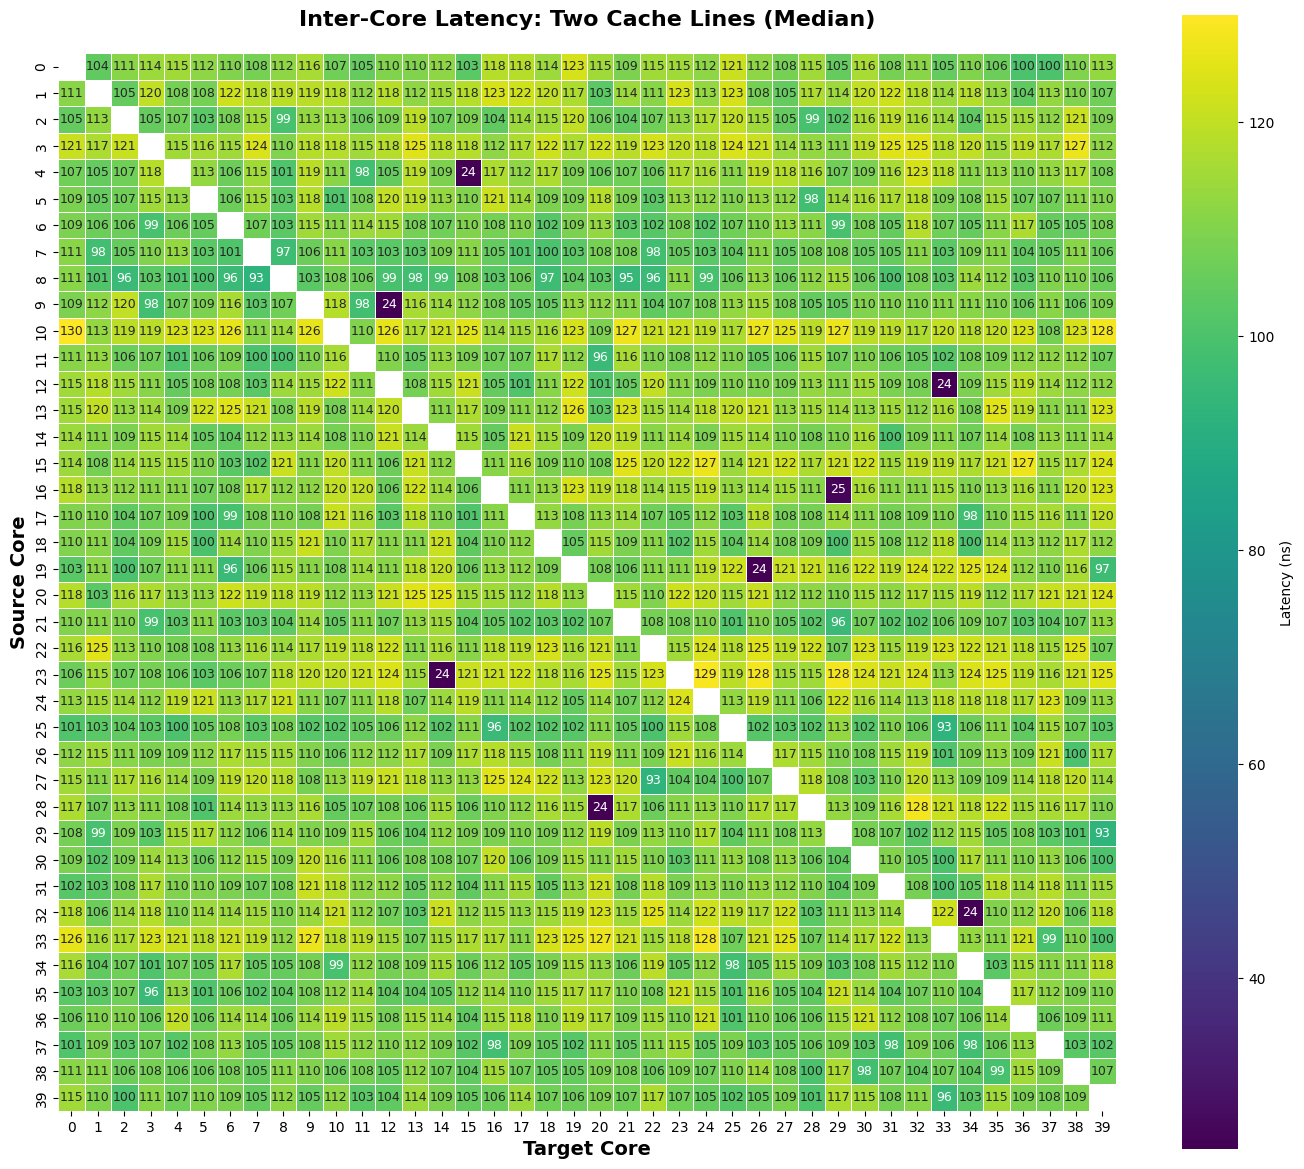

In [ ]:
fig2, matrix2 = create_heatmap(
    df_two, 'latency_ns_med',
    'Inter-Core Latency: Two Cache Lines (Median)',
    save_path='results/heatmap_two_median.png'
)
plt.show()


## 6. One Cache Line - P95


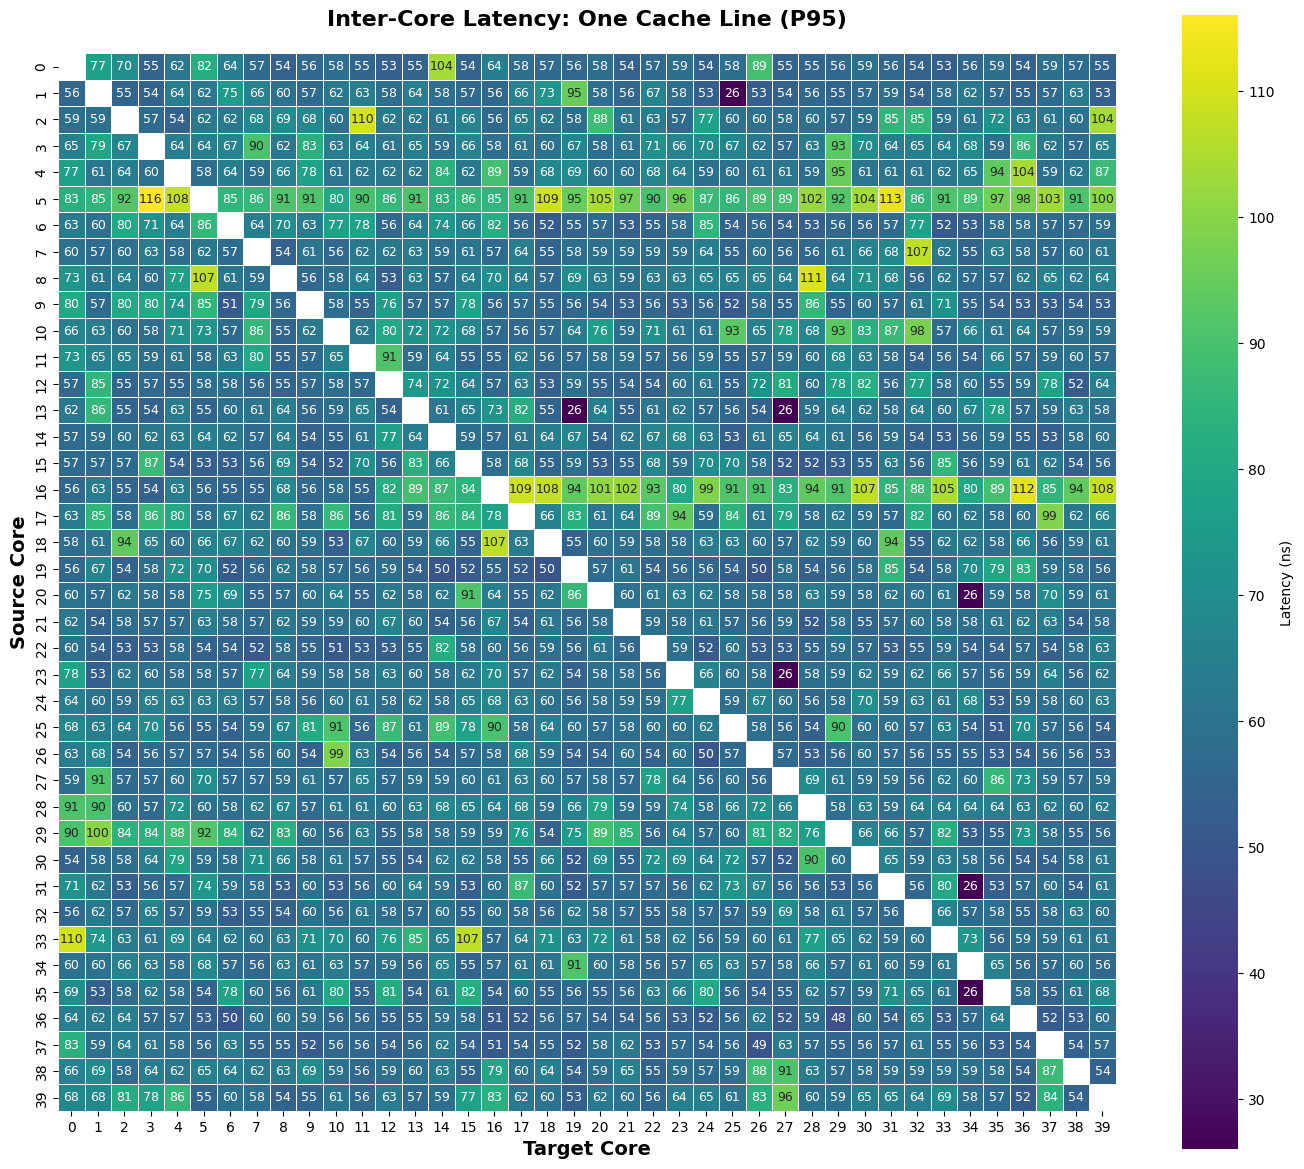

In [22]:
fig3, matrix3 = create_heatmap(
    df_one, 'latency_ns_p95',
    'Inter-Core Latency: One Cache Line (P95)',
    save_path='results/heatmap_one_p95.png'
)
plt.show()


## 7. Two Cache Lines - P95


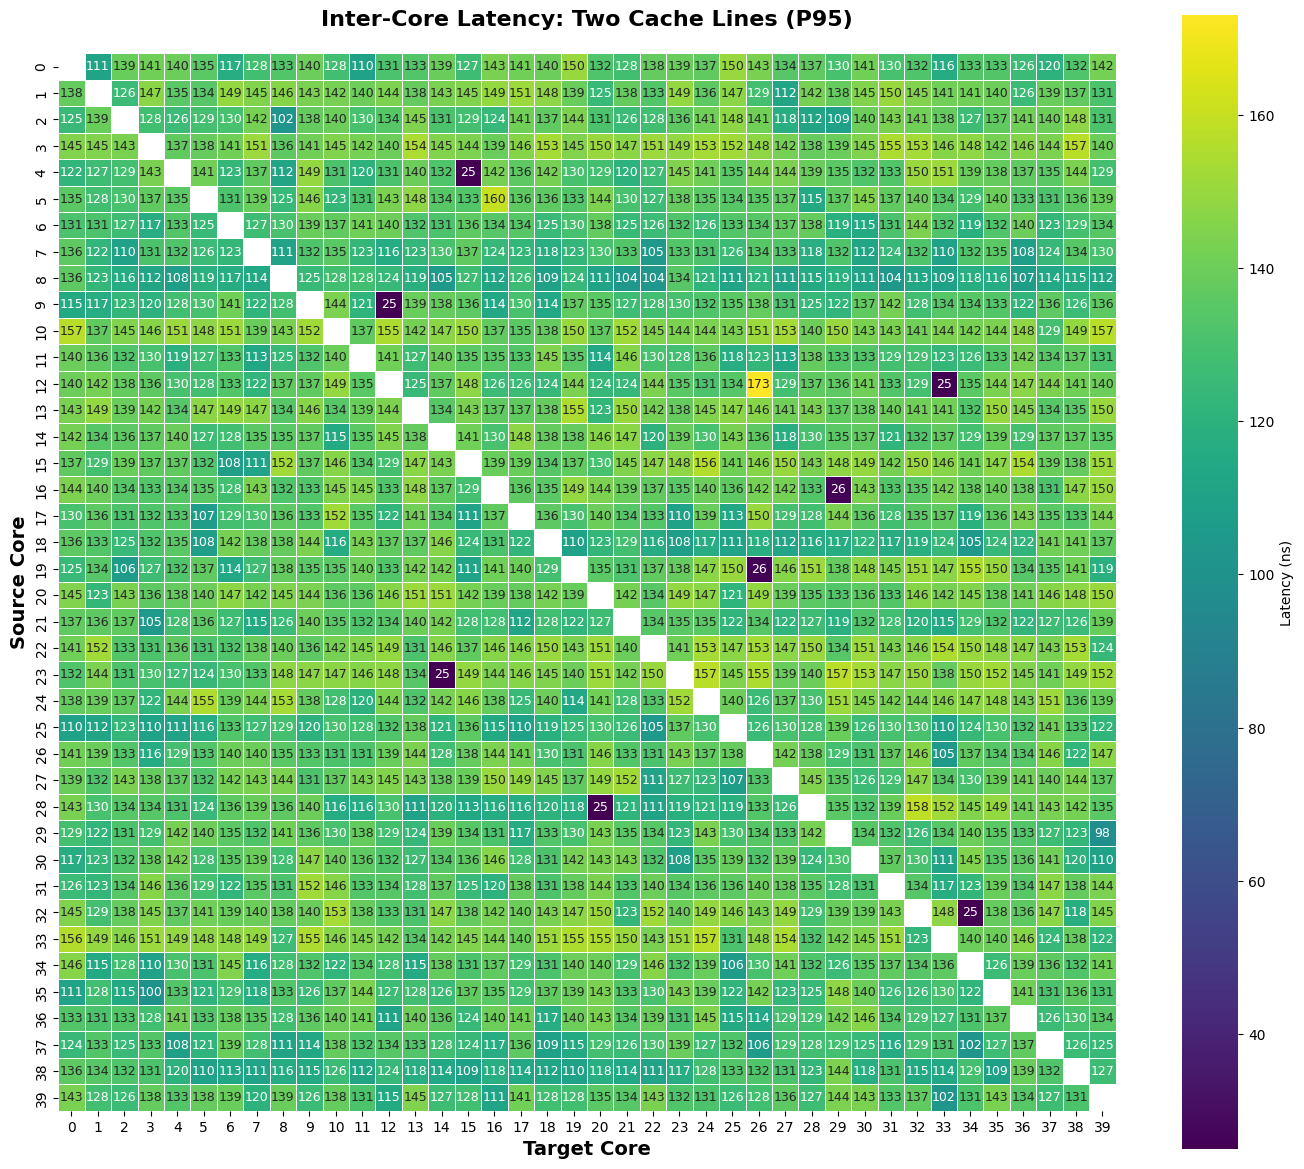

In [23]:
fig4, matrix4 = create_heatmap(
    df_two, 'latency_ns_p95',
    'Inter-Core Latency: Two Cache Lines (P95)',
    save_path='results/heatmap_two_p95.png'
)
plt.show()


## 8. Distribution

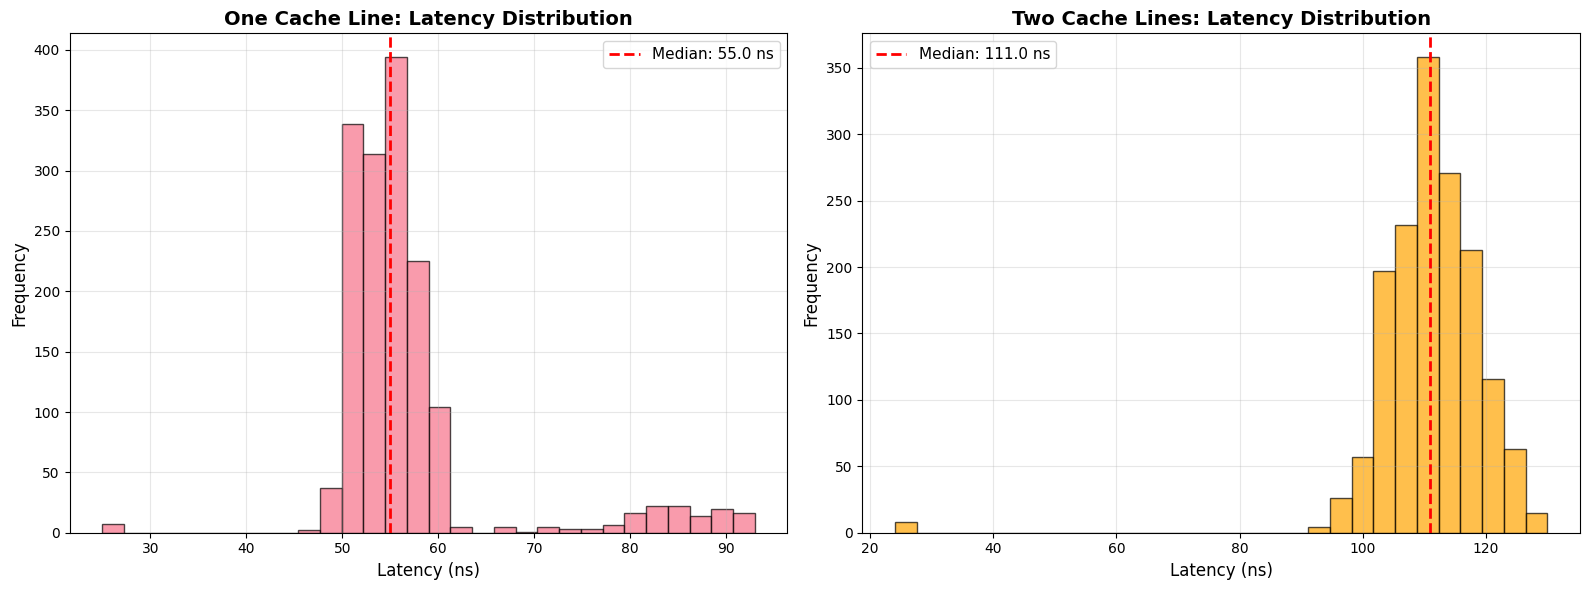

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df_one['latency_ns_med'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(df_one['latency_ns_med'].median(), color='red', linestyle='--',
                linewidth=2, label=f'Median: {df_one["latency_ns_med"].median():.1f} ns')
axes[0].set_xlabel('Latency (ns)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('One Cache Line: Latency Distribution', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].hist(df_two['latency_ns_med'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(df_two['latency_ns_med'].median(), color='red', linestyle='--',
                linewidth=2, label=f'Median: {df_two["latency_ns_med"].median():.1f} ns')
axes[1].set_xlabel('Latency (ns)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Two Cache Lines: Latency Distribution', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/distribution_comparison.png', dpi=150, bbox_inches='tight')
plt.show()



## 9. Топология CPU


In [25]:
min_idx = df_one['latency_ns_med'].idxmin()
max_idx = df_one['latency_ns_med'].idxmax()

print("\nCPU Topology Analysis:")
print("="*60)
print(f"\n✓ Fastest communication:")
print(f"  Cores: {df_one.loc[min_idx, 'core1']} <-> {df_one.loc[min_idx, 'core2']}")
print(f"  Latency: {df_one.loc[min_idx, 'latency_ns_med']:.1f} ns (median)")
print(f"  P90: {df_one.loc[min_idx, 'latency_ns_p90']:.1f} ns")
print(f"  P95: {df_one.loc[min_idx, 'latency_ns_p95']:.1f} ns")

print(f"\n✓ Slowest communication:")
print(f"  Cores: {df_one.loc[max_idx, 'core1']} <-> {df_one.loc[max_idx, 'core2']}")
print(f"  Latency: {df_one.loc[max_idx, 'latency_ns_med']:.1f} ns (median)")
print(f"  P90: {df_one.loc[max_idx, 'latency_ns_p90']:.1f} ns")
print(f"  P95: {df_one.loc[max_idx, 'latency_ns_p95']:.1f} ns")


CPU Topology Analysis:

✓ Fastest communication:
  Cores: 1 <-> 25
  Latency: 25.0 ns (median)
  P90: 26.0 ns
  P95: 26.0 ns

✓ Slowest communication:
  Cores: 16 <-> 17
  Latency: 93.0 ns (median)
  P90: 94.0 ns
  P95: 109.0 ns
